In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv( "Downloads/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:

df.loc[10]

longitude              -122.26
latitude                 37.85
housing_median_age        52.0
total_rooms             2202.0
total_bedrooms           434.0
population               910.0
households               402.0
median_income           3.2031
median_house_value    281500.0
ocean_proximity       NEAR BAY
Name: 10, dtype: object

In [5]:
df.dropna( inplace = True)

In [6]:
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop( ["median_house_value"], axis = 1)
y = df[ "median_house_value" ]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

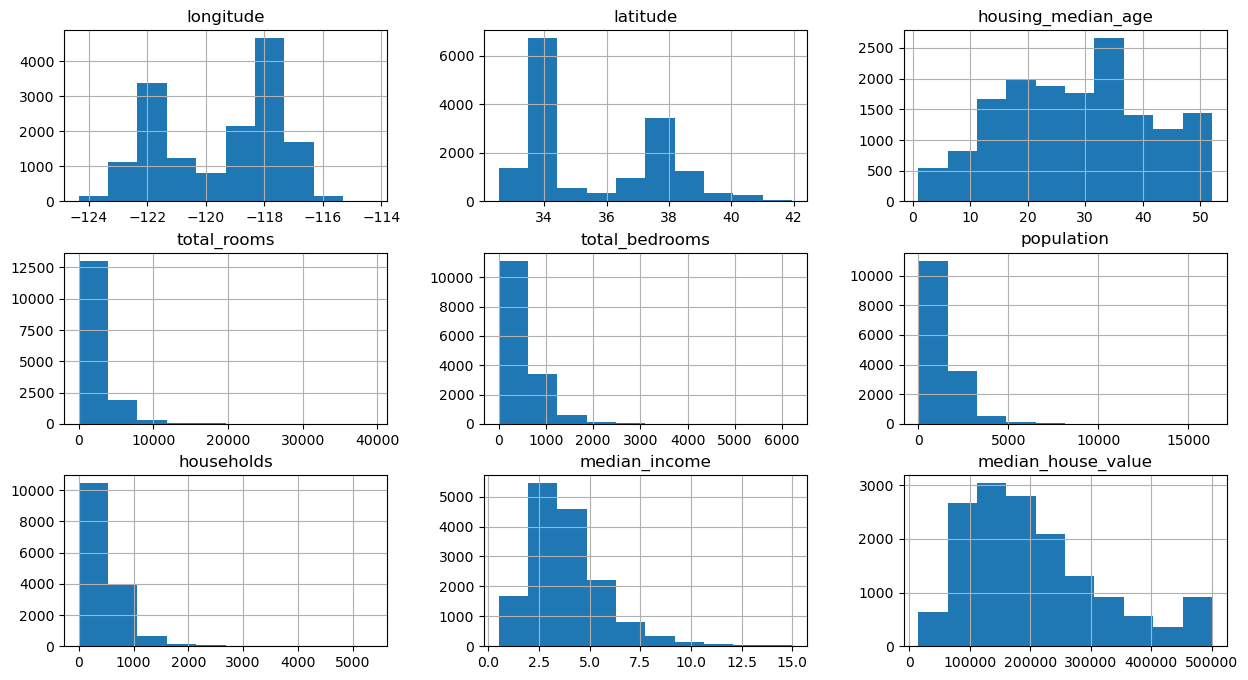

In [8]:
train_data= X_train.join( y_train )
train_data.hist( figsize=(15,8))



<Axes: >

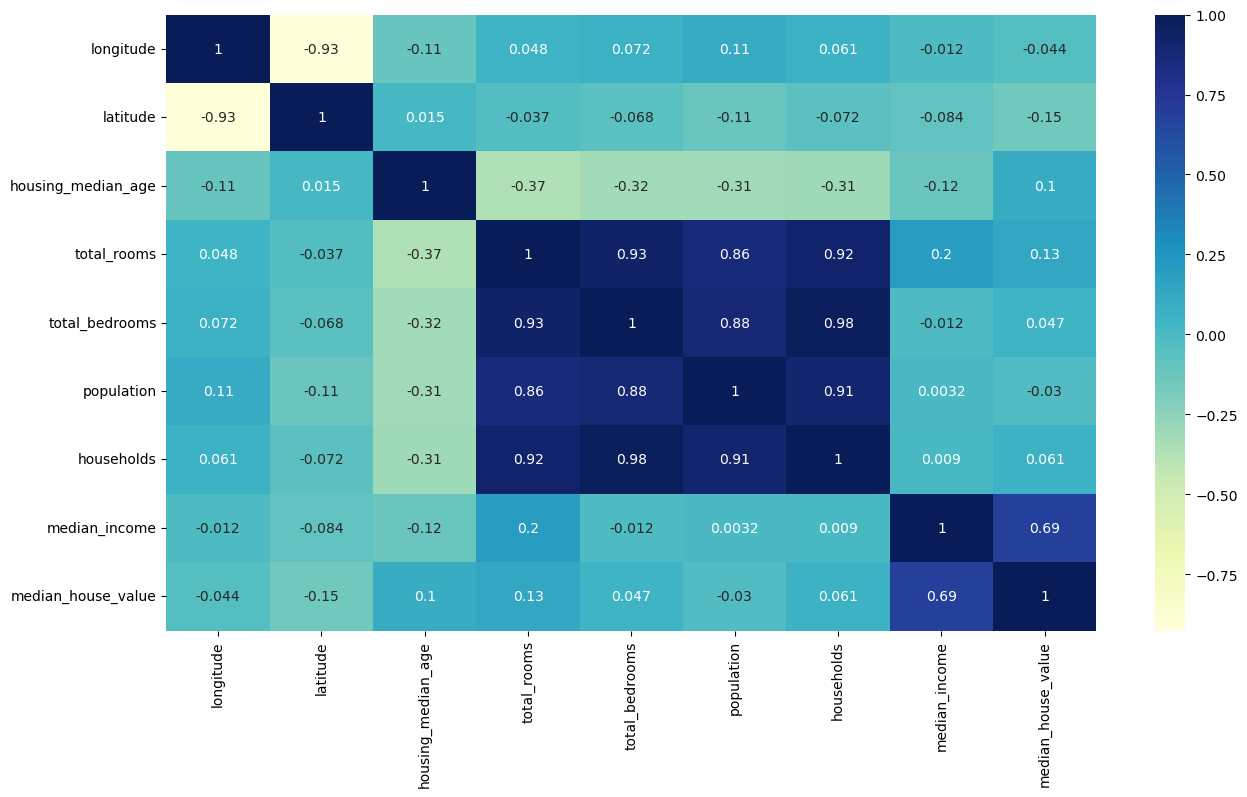

In [9]:
plt.figure( figsize=(15,8))

numeric_data=train_data.select_dtypes( include =["number"])
sns.heatmap( numeric_data.corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

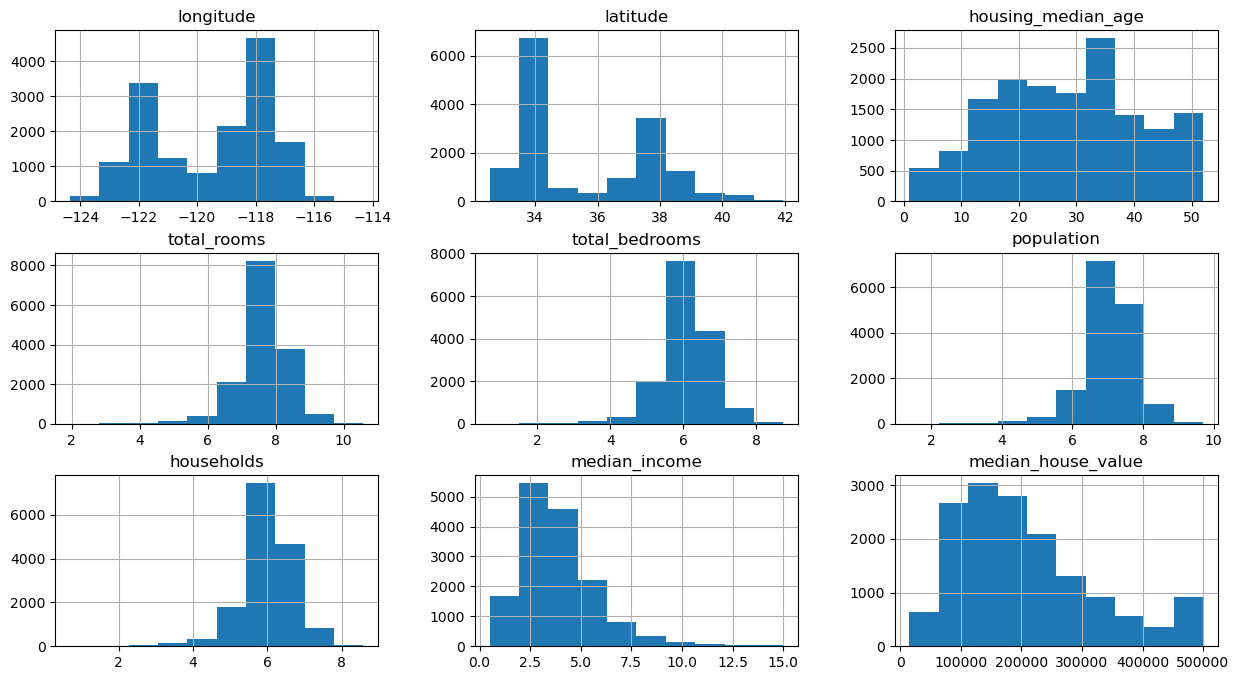

In [10]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1 )
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1 )
train_data["households"] = np.log(train_data["households"] + 1 )
train_data["population"] = np.log(train_data["population"] + 1 )

train_data.hist( figsize=(15,8))

In [11]:
 train_data= train_data.join(pd.get_dummies( train_data.ocean_proximity )).drop(["ocean_proximity"], axis = 1)


<Axes: >

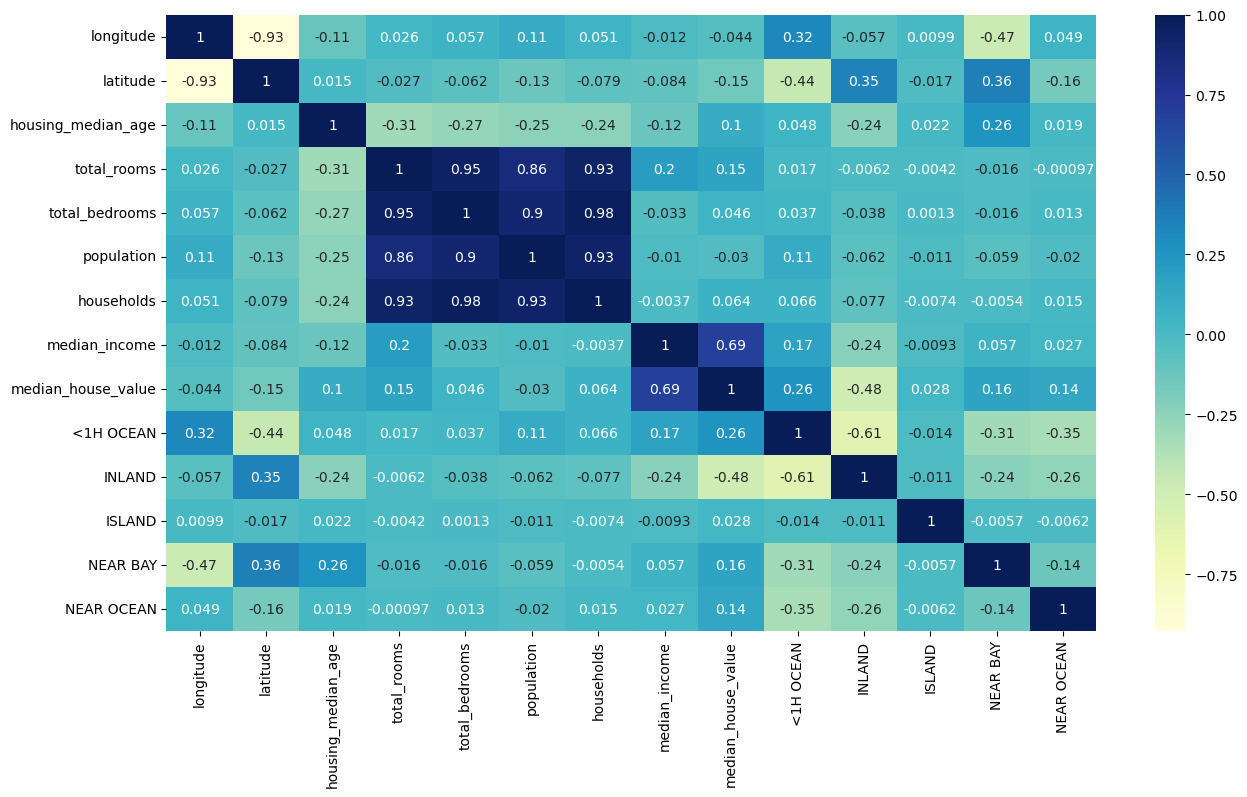

In [12]:
plt.figure( figsize=(15,8))

sns.heatmap( train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

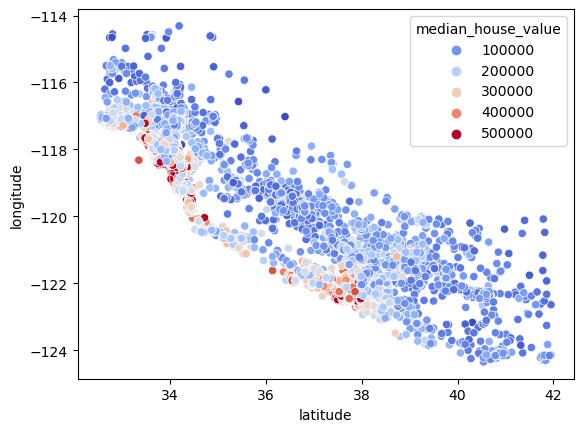

In [13]:
sns.scatterplot( x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

<Axes: >

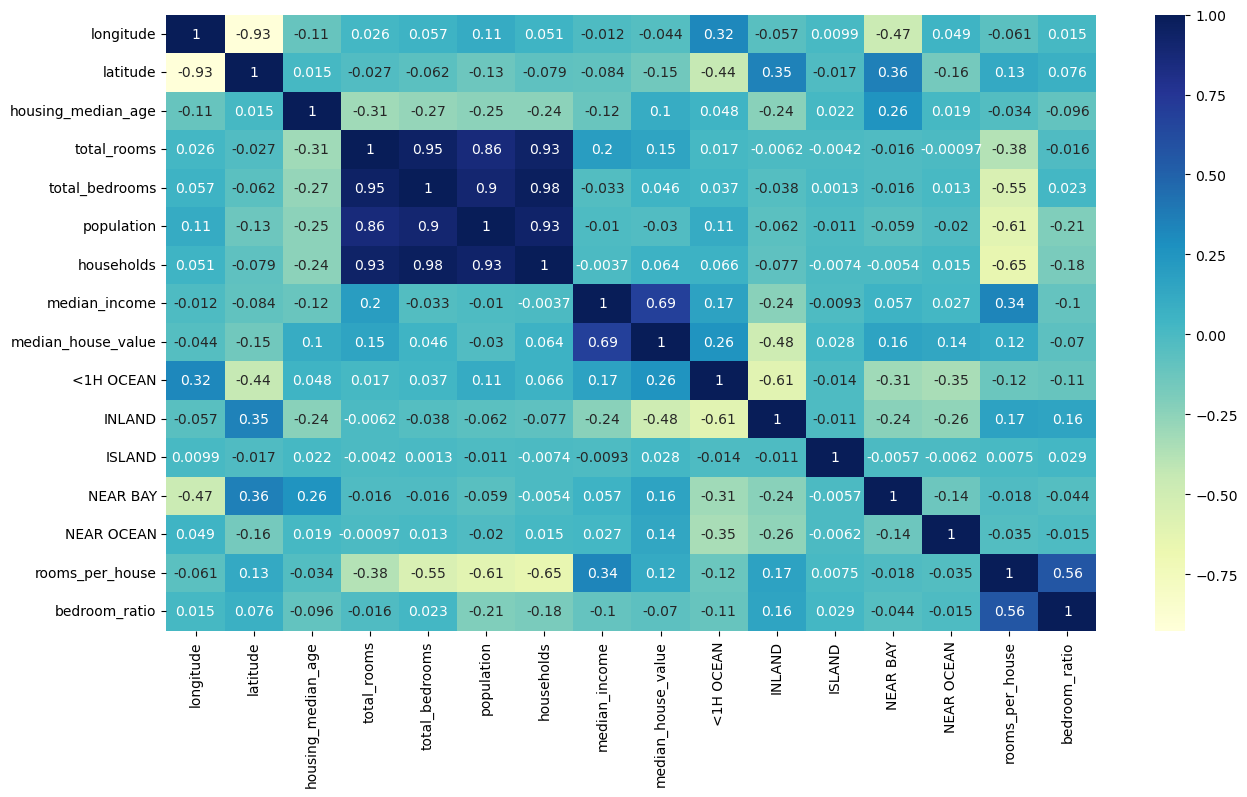

In [14]:
train_data["rooms_per_house"] = train_data[ "total_rooms"] / train_data[ "households"]
                                                                        
train_data["bedroom_ratio"] = train_data[ "total_bedrooms"] / train_data[ "households"]
plt.figure( figsize=(15,8))

sns.heatmap( train_data.corr(), annot=True, cmap="YlGnBu")

In [15]:
X_train = train_data.drop(["median_house_value"], axis = 1)
y_train = train_data["median_house_value"]
reg = LinearRegression()

reg.fit( X_train, y_train)

LinearRegression()

In [16]:
test_data = X_test.join(y_test)
test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1 )
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1 )
test_data["households"] = np.log(test_data["households"] + 1 )
test_data["population"] = np.log(test_data["population"] + 1 )

test_data= test_data.join(pd.get_dummies( test_data.ocean_proximity )).drop(["ocean_proximity"], axis = 1)
test_data["rooms_per_house"] = test_data[ "total_rooms"] / test_data[ "households"]
                                                                        
test_data["bedroom_ratio"] = test_data[ "total_bedrooms"] / test_data[ "households"]


X_test = test_data.drop(["median_house_value"], axis = 1)
y_test = test_data["median_house_value"]

reg.score(X_test, y_test)

0.6716045011195922

In [17]:

# Using Random Forest Model


In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
forest = RandomForestRegressor()
forest.fit( X_train, y_train)
forest.score(X_test, y_test)

0.8153480763844143